# This notebook focus on understanding the initial online Incident Tracker

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import datetime

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [2]:
incident_tracker = pq.read_table('../data_folder/Online_Incident_Tracker_Jan07.parquet')

In [3]:
incident_tracker

pyarrow.Table
ESN: string
DSID: string
REL_ESN: string
CMP_SUM_NET_AMOUNT: double
CMP_SUM_MATERIALS_AMOUNT: double
CMP_SUM_MARKUP_AMOUNT: double
CMP_SUM_REPAIR_LABOR_AMOUNT: double
CMP_SUM_OTHER_EXPENSE_AMOUNT: double
CMP_SUM_DEDUCTIBLE_AMOUNT: double
CMP_FAIL_DATE_LIST: list<element: string>
  child 0, element: string
CMP_ESN_LIST: list<element: string>
  child 0, element: string
CMP_FAIL_CODE_LIST: list<element: string>
  child 0, element: string
CMP_FAIL_CODE_DESC_LIST: list<element: string>
  child 0, element: string
CMP_DISTRIBUTOR_CODE_LIST: list<element: string>
  child 0, element: string
CMP_CLAIM_NUM_LIST: list<element: int32>
  child 0, element: int32
CMP_ENGINE_MILES_LIST: list<element: double>
  child 0, element: double
DSID_CREATE_DATE: timestamp[ns]
DSID_LAST_UPDATED_DATE: timestamp[ns]
GREEN_WRENCH_NUM_LIST: list<element: int32>
  child 0, element: int32
GREEN_WRENCH_LIST: list<element: string>
  child 0, element: string
FAULT_CODE_LIST: list<element: int32>
  child 0, e

In [4]:
incident_tracker.shape

(131121, 121)

In [5]:
# incident_tracker_df = incident_tracker.remove_column(119).to_pandas()
incident_tracker_df = incident_tracker.to_pandas()

## Profiling the Pandas Table

In [6]:
incident_tracker_df.shape

(131121, 121)

In [7]:
incident_tracker_df.ESN.nunique()

72982

In [8]:
incident_tracker_df.columns.values

array(['ESN', 'DSID', 'REL_ESN', 'CMP_SUM_NET_AMOUNT',
       'CMP_SUM_MATERIALS_AMOUNT', 'CMP_SUM_MARKUP_AMOUNT',
       'CMP_SUM_REPAIR_LABOR_AMOUNT', 'CMP_SUM_OTHER_EXPENSE_AMOUNT',
       'CMP_SUM_DEDUCTIBLE_AMOUNT', 'CMP_FAIL_DATE_LIST', 'CMP_ESN_LIST',
       'CMP_FAIL_CODE_LIST', 'CMP_FAIL_CODE_DESC_LIST',
       'CMP_DISTRIBUTOR_CODE_LIST', 'CMP_CLAIM_NUM_LIST',
       'CMP_ENGINE_MILES_LIST', 'DSID_CREATE_DATE',
       'DSID_LAST_UPDATED_DATE', 'GREEN_WRENCH_NUM_LIST',
       'GREEN_WRENCH_LIST', 'FAULT_CODE_LIST', 'ENGINE_DESCRIPTION',
       'BUILD_DATE', 'BUILD_YEAR', 'BUILD_MONTH', 'BUILD_DAY_OF_MONTH',
       'BUILD_DAY_OF_WEEK', 'BUILT_ON_WEEKEND',
       'BLOWBY_HIGH_IDLE_LAST_TEST_VALUE',
       'BLOWBY_LOW_IDLE_LAST_TEST_VALUE',
       'BLOWBY_RATED_HP_LAST_TEST_VALUE',
       'ECM_BOOST_ABS_HIGH_IDLE_LAST_TEST_VALUE',
       'ECM_BOOST_ABS_LOW_IDLE_LAST_TEST_VALUE',
       'ECM_BOOST_ABS_RATED_HP_LAST_TEST_VALUE',
       'ECM_COOLANT_TEMP_HIGH_IDLE_LAST_TEST_VALUE',


In [9]:
incident_tracker_df.head()

ESN       DSID   REL_ESN  CMP_SUM_NET_AMOUNT  \
0  79625225  DSBFN7346  79625225              486.96   
1  79625225  DSBGK4229  79625225             3611.25   
2  79625225  DSBGS3744  79625225              503.51   
3  79625225  DSBHF5044  79625225              687.58   
4  79631430  DSBJV9325  79631430              327.73   

   CMP_SUM_MATERIALS_AMOUNT  CMP_SUM_MARKUP_AMOUNT  \
0                    196.12                  58.84   
1                   2420.42                 605.57   
2                     48.24                  14.47   
3                    340.60                 102.18   
4                    187.82                  56.35   

   CMP_SUM_REPAIR_LABOR_AMOUNT  CMP_SUM_OTHER_EXPENSE_AMOUNT  \
0                       232.00                          0.00   
1                       568.40                         16.86   
2                       440.80                          0.00   
3                       244.80                          0.00   
4                        82.94                          0.00   

   CMP_SUM_DEDUCTIBLE_AMOUNT        CMP_FAIL_DATE_LIST  \
0                        0.0              [2014-08-13]   
1                        0.0  [2015-01-02, 2015-01-02]   
2                        0.0              [2015-02-19]   
3                        0.0              [2015-04-28]   
4                        0.0              [2016-01-13]   

                ...                ECM_OIL_TEMP_RATED_HP_COUNT_OF_TESTS  \
0               ...                                                 NaN   
1               ...                                                 NaN   
2               ...                                                 NaN   
3               ...                                                 NaN   
4               ...                                                 NaN   

  ECM_RAIL_PRESS_HIGH_IDLE_COUNT_OF_TESTS  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   

  ECM_RAIL_PRESS_LOW_IDLE_COUNT_OF_TESTS  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

  ECM_RAIL_PRESS_RATED_HP_COUNT_OF_TESTS  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

  ENGINE_TORQUE_HIGH_IDLE_COUNT_OF_TESTS  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

  ENGINE_TORQUE_LOW_IDLE_COUNT_OF_TESTS ENGINE_TORQUE_RATED_HP_COUNT_OF_TESTS  \
0                                   NaN                                   NaN   
1                                   NaN                                   NaN   
2                                   NaN                                   NaN   
3                                   NaN                                   NaN   
4                                   NaN                                   NaN   

  OIL_TEMP_HIGH_IDLE_COUNT_OF_TESTS OIL_TEMP_LOW_IDLE_COUNT_OF_TESTS  \
0                               NaN                              NaN   
1                               NaN                              NaN   
2                               NaN                              NaN   
3                               NaN                              NaN   
4                               NaN                              NaN   

  OIL_TEMP_RATED_HP_COUNT_OF_TESTS  
0                              NaN  
1                              NaN  
2                              NaN  
3                          

In [10]:
incident_tracker_df.loc[(incident_tracker_df.ESN != incident_tracker_df.REL_ESN), :]

ESN       DSID   REL_ESN  CMP_SUM_NET_AMOUNT  \
299     79698092  DSBGL7085  79698082              476.22   
330     79705749  DSBFR8219  79734651              387.96   
795     79634776  DSBHS5466  79493131             3916.23   
973     79680697  DSBCY6203  79680967              384.01   
1017    79688809  DSBFF7437  79678002              556.58   
1287    79789612  DSBLJ0399  79789608              218.30   
3162    79676724  DSBHJ7799  79676725             5204.14   
3473    79768344  DSBHM1602  79768341             2222.19   
3492    79779730  DSBFY4409  79570294             4030.84   
3632    79833502  DSBJW7987  79833507             2741.77   
4509    79648657  DSBFR1429  79648665             6294.60   
4620    79676168  DSBGN8117  79686168             5512.61   
4893    79769368  DSBGZ7319  79769386              126.00   
4985    79807655  DSBKQ1599  79801655               90.35   
5020    79821345  DSBLK2127  60815776             1104.48   
5272    79657746  DSBHJ7320  79656914             1033.27   
5378    79681171  DSBDJ0005  79681173             3946.61   
5396    79683654  DSBCZ9484  79683954             2948.74   
5402    79685056  DSBJG7232  79685065             1112.31   
5422    79693944  DSBFJ3391  79693536              576.63   
5595    79741290  DSBHH8361  79741250              486.40   
5926    79641667  DSBCZ7760  79641677             5392.44   
6119    79686458  DSBKB3490  79590252             2250.26   
6703    79657627  DSBLG1577  79657637             3499.48   
6851    79698521  DSBDT4283  79648521             4246.40   
7603    79710194  DSBLP4329  79874411             4640.45   
8147    79660321  DSBGP4462  79659586             5182.25   
8709    79942406  DSBMK1394  79742406             1458.28   
8951    79683260  DSBGF8431  79731226             3712.35   
9178    79766056  DSBHZ4865  79759861             1353.75   
...          ...        ...       ...                 ...   
123264  79682810  DSBGH5878  79682816            14688.40   
123313  79691771  DSBGS1482  79681771              781.57   
123872  79684860  DSBDW7691  79654860              499.04   
123891  79696301  DSBJT2999  79693601               81.00   
124033  79753932  DSBHM6303  79759392             7877.60   
124100  79772919  DSBGD8423  79764577              138.00   
124435  79686434  DSBGJ5520  79686433             2662.31   
124591  79759261  DSBJV4827  79870377             4917.08   
124727  79822397  DSBHV2066  79833297              541.00   
124833  79962242  DSBNF1307  79962642             1613.34   
124903  79648977  DSBHL2174  73626276              221.00   
125875  79811976  DSBHP5875  79811971              432.00   
126072  79640065  DSBDW0447  79640064              973.15   
126136  79659606  DSBHZ0435  79659604              805.90   
126219  79689260  DSBHC4878  79689280              521.59   
126340  79754608  DSBGQ2305  79544608              136.82   
126474  79825616  DSBKS2607  79826050              170.30   
126703  79669008  DSBHS2136  79669068              135.85   
126804  79703246  DSBGQ3900  79447870             1291.36   
127310  79667576  DSBMC3861  79667573             1420.15   
127736  79867049  DSBKP1688  79866570              838.87   
128087  79757972  DSBGJ1660  79747972              962.00   
128425  79652055  DSBHW5452  79652967             4406.71   
128540  79690078  DSBLS1678  79680078              490.90   
128613  79718948  DSBGF6111  79718748              631.15   
129536  79639725  DSBJN4223  79636725             1556.30   
129584  79655293  DSBCF5582  79655203              615.78   
129884  79771576  DSBGQ0050  79771567              522.50   
130630  79643842  DSBCN7538  79440797              521.21   
130901  79755089  DSBLF5696  79720621             4943.18   

        CMP_SUM_MATERIALS_AMOUNT  CMP_SUM_MARKUP_AMOUNT  \
299                       241.22                   0.00   
330                       196.12                  58.84   
795                      2018.25                 505.

In [37]:
incident_tracker_df.groupby('BUILD_YEAR').count()['ESN'].reset_index().\
 merge(incident_tracker_df.groupby('BUILD_YEAR').ESN.nunique().reset_index(), 
       on = 'BUILD_YEAR')

BUILD_YEAR  ESN_x  ESN_y
0        2011      1      1
1        2012   1354    489
2        2013  55421  24791
3        2014  42734  25059
4        2015  24797  17023
5        2016   5745   4649
6        2017   1069    970

In [17]:
incident_tracker_df.loc[~incident_tracker_df.BUILD_DATE.isnull(), 
                        ['DSID_CREATE_DATE', 'CMP_FAIL_DATE_LIST', 
                            'BUILD_DATE']].\
    sort_values('BUILD_DATE')

DSID_CREATE_DATE                    CMP_FAIL_DATE_LIST BUILD_DATE
1509   2013-09-30 16:34:22                          [2013-09-30] 2011-04-26
83740  2014-02-07 09:34:17                          [2014-02-06] 2012-01-26
83739  2013-09-14 09:13:51                          [2013-09-14] 2012-01-26
119488 2014-03-05 23:27:30                          [2014-03-05] 2012-01-26
83741  2014-01-10 11:27:57              [2013-11-13, 2013-11-13] 2012-01-26
44156  2015-11-05 16:30:34                          [2015-11-05] 2012-02-02
44155  2015-04-13 12:35:22                          [2015-04-13] 2012-02-02
115915 2013-06-12 12:38:02              [2013-06-07, 2013-06-07] 2012-02-02
82473  2014-05-15 09:51:43                          [2014-05-15] 2012-02-02
82474  2014-09-30 14:46:22                          [2014-09-30] 2012-02-02
7265   2015-03-02 21:07:20                          [2015-02-13] 2012-02-02
7264   2016-12-05 13:44:25  [2016-12-02, 2016-12-02, 2016-12-02] 2012-02-02
115914 2015-03-13 17:06:19                          [2015-03-13] 2012-02-02
37323  2014-04-28 12:00:09              [2014-04-28, 2014-04-28] 2012-02-02
115918 2014-08-07 08:22:57                          [2014-08-07] 2012-02-02
115917 2015-10-27 15:07:19                          [2015-10-27] 2012-02-02
115916 2016-02-22 20:22:49                          [2016-02-17] 2012-02-02
7263   2015-04-25 07:57:44                          [2015-04-25] 2012-02-02
77959  2015-03-23 14:04:58                          [2015-01-16] 2012-02-02
124836 2014-02-07 03:57:15              [2014-02-06, 2014-02-06] 2012-02-07
124837 2015-10-08 15:07:29              [2015-10-08, 2015-10-08] 2012-02-07
66862  2015-02-17 09:29:24                          [2015-02-10] 2012-02-07
66861  2014-01-23 18:41:36                          [2014-02-07] 2012-02-07
66863  2017-02-14 07:59:35                          [2017-02-06] 2012-02-07
66864  2013-08-28 07:25:36                          [2013-08-27] 2012-02-07
11568  2017-02-07 12:09:20              [2017-01-30, 2017-01-30] 2012-08-16
10854  2013-09-16 15:54:30              [2013-09-16, 2013-09-16] 2012-08-16
10855  2014-07-02 10:25:25                          [2014-07-02] 2012-08-16
10856  2013-12-28 01:49:27                          [2013-12-28] 2012-08-16
10857  2014-06-06 11:52:05                          [2014-06-06] 2012-08-16
...                    ...                                   ...        ...
47557  2017-09-25 18:53:03                          [2017-09-25] 2017-08-31
121319 2017-11-10 10:32:07                          [2017-11-09] 2017-08-31
29814  2017-10-09 09:17:05              [2017-09-20, 2017-09-20] 2017-08-31
86940  2017-09-21 13:19:42                          [2017-09-21] 2017-09-01
86280  2017-10-25 12:03:01                          [2017-10-25] 2017-09-06
32552  2017-10-05 10:45:55                          [2017-10-03] 2017-09-06
130043 2017-11-20 10:57:21                          [2017-11-20] 2017-09-06
35964  2017-11-14 10:31:30                          [2017-11-13] 2017-09-07
58932  2017-10-26 00:14:42                          [2017-10-25] 2017-09-07
75988  2017-11-13 10:57:18                          [2017-11-13] 2017-09-08
77958  2017-10-12 14:10:24                          [2017-10-10] 2017-09-08
6578   2017-10-11 14:01:30                          [2017-10-11] 2017-09-08
46876  2017-11-06 15:23:29                          [2017-11-06] 2017-09-08
98389  2017-10-06 08:42:00              [2017-10-06, 2017-10-06] 2017-09-10
79245  2017-10-16 14:01:58                          [2017-10-16] 2017-09-10
130579 2017-10-04 18:43:38                          [2017-10-04] 2017-09-12
5860   2017-11-12 09:19:10                          [2017-11-10] 2017-09-13
115913 2017-11-07 07:17:11                          [2017-11-07] 2017-09-14
115281 2017-11-11 08:25:59                          [2017-11-11] 2017-09-17
115282 2017-11-13 23:46:22                          [2017-11-13] 2017-09-17
78611  2017-10-16 12:48:05                          [2017-

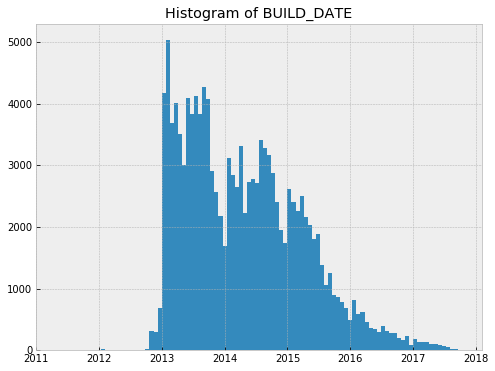

In [18]:
incident_tracker_df.BUILD_DATE.hist(bins = 100)
plt.title('Histogram of BUILD_DATE')
plt.show()

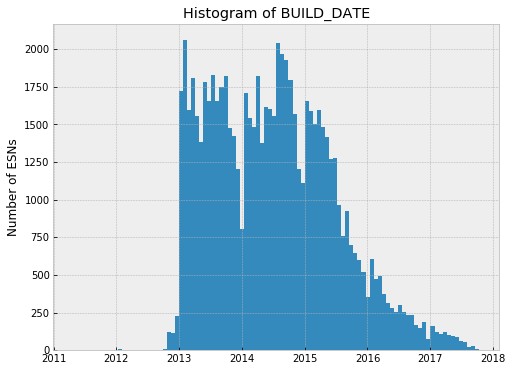

In [21]:
incident_tracker_df.loc[:, ['ESN', 'BUILD_DATE']].groupby('ESN').first()['BUILD_DATE'].hist(bins = 100)
plt.title('Histogram of BUILD_DATE')
plt.ylabel('Number of ESNs')
plt.show()

### GreenWrench Coverage

In [22]:
incident_tracker_df.GREEN_WRENCH_LIST

0                                    [K82362913, K82362913]
1              [K00534143, K00534143, K00534143, K00534143]
2                                    [K29820251, K29820251]
3              [K05315862, K05315862, K12024294, K12024294]
4              [K50525305, K50525305, K50525305, K50525305]
5                                    [K14001133, K14001133]
6                                    [K42592150, K42592150]
7              [K64794231, K64794231, K00534143, K00534143]
8                                    [K12550558, K12550558]
9                                    [K71004803, K45144541]
10        [K42592150, K42592150, K10244122, K62597872, K...
11                                   [K32153832, K32153832]
12                                   [K12098289, K23811253]
13                                   [K50525305, K50525305]
14                                   [K20021521, K20021521]
15                                   [K77070525, K77070525]
16                                   [K3

In [23]:
incident_tracker_df.GREEN_WRENCH_NUM_LIST

0                                                   [5, 5]
1                                         [10, 10, 10, 10]
2                                                   [9, 9]
3                                             [1, 1, 1, 1]
4                                             [2, 2, 2, 2]
5                                                   [3, 3]
6                                                   [5, 5]
7                                             [5, 5, 5, 5]
8                                                   [3, 3]
9                                                   [1, 1]
10                                         [2, 2, 2, 2, 2]
11                                                  [2, 2]
12                                                  [4, 4]
13                                                  [2, 2]
14                                                  [4, 4]
15                                                  [5, 5]
16                                                  [4, 

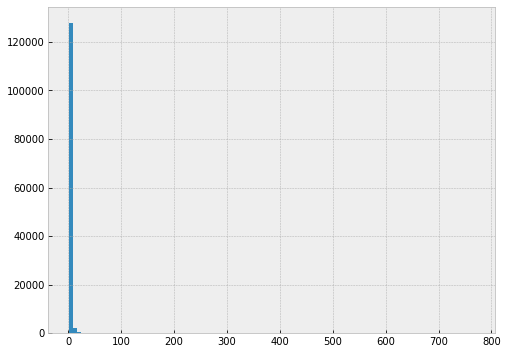

In [24]:
incident_tracker_df.GREEN_WRENCH_LIST.apply(len).hist(bins = 100)
plt.show()

In [25]:
incident_tracker_df.GREEN_WRENCH_LIST.apply(len).value_counts()

2      75586
1      21696
4      16019
3       6543
6       3694
8       1939
5       1810
10       622
7        618
12       491
9        348
16       208
14       197
18       129
11       119
15       114
20        94
24        86
13        81
17        72
22        50
30        47
19        44
21        35
26        34
28        29
36        28
32        27
34        22
23        20
       ...  
255        1
660        1
465        1
116        1
115        1
239        1
108        1
104        1
102        1
98         1
95         1
93         1
86         1
212        1
210        1
79         1
152        1
78         1
76         1
331        1
67         1
65         1
192        1
63         1
62         1
59         1
58         1
379        1
156        1
256        1
Name: GREEN_WRENCH_LIST, Length: 118, dtype: int64

### Fail Code

In [26]:
incident_tracker_df.CMP_FAIL_CODE_LIST.apply(len).value_counts().reset_index()

index  CMP_FAIL_CODE_LIST
0      1              101505
1      2               21839
2      3                5927
3      4                1358
4      5                 322
5      6                 132
6      7                  22
7      8                  11
8      9                   4
9     24                   1

In [27]:
incident_tracker_df.CMP_FAIL_CODE_LIST.apply(len).sum()

171100

In [28]:
incident_tracker_df.CMP_FAIL_CODE_LIST.\
    apply(pd.Series).unstack().reset_index(drop=True).\
    dropna().reset_index(drop=True)

0         INTD
1         EQPE
2         NYPF
3         YNEB
4         ELTS
5         IRCL
6         EQPE
7         EQPE
8         YNAM
9         BRRC
10        HYBD
11        NYPF
12        KCTS
13        ELTS
14        THAC
15        KTTS
16        YNEB
17        BKCL
18        HYBD
19        FHAV
20        USSC
21        EQPE
22        HYBD
23        YNEB
24        THAC
25        USDU
26        USDU
27        EQPE
28        KBOS
29        HYBD
          ... 
171070    BVBL
171071    EQPE
171072    ETCT
171073    BVCM
171074    FHPM
171075    EXWX
171076    EQPE
171077    BGGG
171078    USDU
171079    USDV
171080    EADF
171081    CHSL
171082    EQPE
171083    EQPE
171084    EADF
171085    EQPE
171086    EQPE
171087    EQPE
171088    EQPE
171089    EQPE
171090    EQPE
171091    EQPE
171092    EQPE
171093    EQPE
171094    EQPE
171095    EQPE
171096    EQPE
171097    EQPE
171098    EQPE
171099    EQPE
Length: 171100, dtype: object

### Compare to Standalone Incident Tracker

In [29]:
cluster_result = pd.read_csv('../data_folder/cluster.csv')

In [30]:
cluster_result.Fail_Code_Cleaned.value_counts().reset_index().\
    rename(columns = {'index':"Fail_Code", 'Fail_Code_Cleaned':'Incident_Count'})

Fail_Code  Incident_Count
0     Unknown            1904
1        EQPE             386
2        WEQP             260
3        XXIP             192
4        ETEB             131
5        XMFT             126
6        EICM             119
7        USDV             101
8        THAS              78
9        ELTS              78
10       FHAS              77
11       WETE              62
12       USDU              61
13       BMSR              54
14       UMSA              47
15       EADB              42
16       ETOB              42
17       FHAV              39
18       EEBT              39
19       FIAS              37
20       YNEB              37
21       ETMO              34
22       IRCL              32
23       EADF              29
24       THAC              29
25       YNSM              28
26       EACC              24
27       KHBT              22
28       WFHA              22
29       EARB              19
..        ...             ...
208      SBCD               1
209      KCOR               1
210      FISL               1
211      RAAS               1
212      FHGR               1
213      BKIG               1
214      ELTU               1
215      NYIN               1
216      BCGR               1
217      LNST               1
218      BBOR               1
219      LPPR               1
220      DHHY               1
221      KPAS               1
222      SLCL               1
223      LNPT               1
224      IECS               1
225      CHGK               1
226      BGGE               1
227      EXPT               1
228      SBDN               1
229      BNRF               1
230      NETU               1
231      LNPL               1
232      BEPU               1
233      UMSH               1
234      YNEW               1
235      IRBL               1
236      NYMP               1
237      SBAA               1

[238 rows x 2 columns]

In [31]:
incident_tracker_df.CMP_FAIL_CODE_LIST.\
    apply(pd.Series).unstack().reset_index(drop=True).\
    dropna().reset_index(drop=True).value_counts().reset_index().\
    rename(columns = {'index':'Fail_Code', '0':'Incident_Count'})

Fail_Code      0
0        EQPE  20142
1        YNEB  19322
2        USDU   7383
3        THAC   6509
4        EADF   6191
5        FIAS   5589
6        THAS   5576
7        HYBD   5400
8        NYPF   5096
9        FHAS   4109
10       EEBT   3758
11       INTD   3024
12       USDV   2959
13       EADB   2779
14       USSC   2777
15       LCOR   2650
16       LCBP   2577
17       EXWH   2526
18       IRCL   2479
19       NYCY   2097
20       BPCR   2011
21       ETCT   1806
22       ELTS   1777
23       IRVB   1739
24       EICM   1657
25       YNAP   1495
26       THEQ   1463
27       YNAM   1433
28       KTTS   1283
29       FHPH   1257
..        ...    ...
826      EFHS      1
827      FEAD      1
828      NCSP      1
829      SXIG      1
830      NISP      1
831      KVRT      1
832      BBCN      1
833      LCWB      1
834      EQVA      1
835      EASF      1
836      NRFI      1
837      IRRP      1
838      IRCF      1
839      FLIF      1
840      EUMH      1
841      INCL      1
842      SWWC      1
843      KREL      1
844      KCMH      1
845      SWBH      1
846      SDIH      1
847      BPCP      1
848      EQEV      1
849      SSTR      1
850      IRGK      1
851      VGEL      1
852      UMSE      1
853      SPES      1
854      ERWH      1
855      EYPW      1

[856 rows x 2 columns]

### Fault Code

In [32]:
incident_tracker_df.FAULT_CODE_LIST.apply(len).value_counts()

2      68994
0      21349
4      14759
1      12911
3       4912
6       3011
8       1684
5       1297
10       475
7        414
12       363
9        199
16       139
14       137
18        61
11        58
20        57
24        46
15        40
13        33
30        21
22        19
26        14
28        13
17        12
19        10
32         9
36         9
21         9
48         6
       ...  
70         3
56         3
29         3
34         3
42         3
35         2
52         2
77         2
38         2
31         2
75         1
135        1
130        1
132        1
81         1
72         1
88         1
66         1
46         1
63         1
61         1
60         1
54         1
50         1
44         1
41         1
25         1
92         1
33         1
242        1
Name: FAULT_CODE_LIST, Length: 63, dtype: int64

In [33]:
fault_code_hash_df = incident_tracker_df.FAULT_CODE_LIST.\
    apply(pd.Series).unstack().reset_index(drop=True).\
    dropna().reset_index(drop=True).value_counts().reset_index()

In [34]:
fault_code_hash_df.columns = ['Fault_Code', 'Incident_Count']

In [35]:
fault_code_hash_df

Fault_Code  Incident_Count
0        3748.0           12769
1        3697.0           12259
2        2387.0           11529
3        1883.0           11228
4        1922.0            9032
5        3545.0            8567
6        2754.0            8403
7        3375.0            7923
8        2973.0            7038
9        4726.0            6369
10       3582.0            5998
11       1885.0            5937
12        559.0            5935
13       1866.0            5865
14       3559.0            5765
15       1887.0            5275
16       1682.0            5201
17       1894.0            4793
18       3225.0            4559
19       3749.0            4158
20       3376.0            3980
21       1925.0            3677
22       3322.0            3216
23       3135.0            3209
24       3383.0            3098
25       3167.0            2806
26       5383.0            2752
27        177.0            2714
28        687.0            2647
29       5882.0            2611
..          ...             ...
521      6646.0               2
522      3744.0               2
523      3326.0               2
524      3561.0               2
525      3388.0               2
526      3343.0               2
527      5865.0               1
528      2359.0               1
529       213.0               1
530      1868.0               1
531      6463.0               1
532      2774.0               1
533      6864.0               1
534      2793.0               1
535       442.0               1
536      2728.0               1
537      3625.0               1
538      1886.0               1
539      6724.0               1
540      4515.0               1
541        25.0               1
542      2676.0               1
543      2262.0               1
544      1731.0               1
545      1795.0               1
546      4841.0               1
547      4378.0               1
548      4369.0               1
549      1638.0               1
550      6265.0               1

[551 rows x 2 columns]

In [36]:
fault_code_hash_df.loc[fault_code_hash_df.Fault_Code.isin([5867, 559, 6766, 4572, 1713, 687, 195, 285, 1867]), :]

Fault_Code  Incident_Count
12        559.0            5935
28        687.0            2647
60       1867.0             942
68        195.0             762
85        285.0             602
146      1713.0             270
207      4572.0             106
277      5867.0              45
303      6766.0              32

### Miles

In [85]:
incident_tracker_df.CMP_ENGINE_MILES_LIST.apply(len).value_counts().reset_index()

index  CMP_ENGINE_MILES_LIST
0      1                 101505
1      2                  21839
2      3                   5927
3      4                   1358
4      5                    322
5      6                    132
6      7                     22
7      8                     11
8      9                      4
9     24                      1

In [27]:
all_miles = incident_tracker_df.CMP_ENGINE_MILES_LIST.\
    apply(pd.Series).unstack().reset_index(drop=True).\
    dropna().reset_index(drop=True)
    

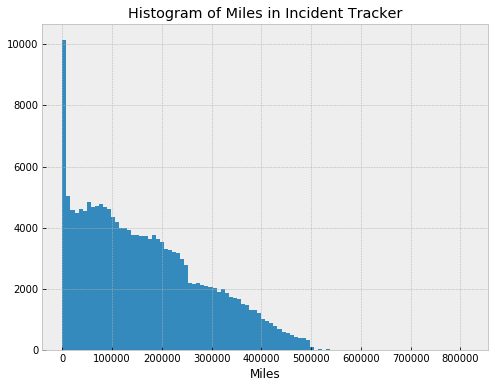

In [70]:
all_miles.hist(bins = 100)
plt.title('Histogram of Miles in Incident Tracker')
plt.xlabel('Miles')
plt.show()

In [30]:
np.median(all_miles)

146196.5

In [92]:
incident_tracker_df_rep = incident_tracker_df.copy()
incident_tracker_df['Last_Mile_Record'] = \
    incident_tracker_df.CMP_ENGINE_MILES_LIST.apply(lambda x:x[-1])
incident_tracker_df['Last_Mile_Record_Time'] = \
    incident_tracker_df.CMP_FAIL_DATE_LIST.apply(lambda x:datetime.datetime.strptime(x[-1], '%Y-%m-%d'))

In [94]:
incident_tracker_df['Start_Year'] = incident_tracker_df.START_DATE.apply(lambda x:x.year)
incident_tracker_df['Days_In_Service'] = (incident_tracker_df.Last_Mile_Record_Time - incident_tracker_df.START_DATE).apply(lambda x:x.days)

In [39]:
incident_tracker_df.groupby('Start_Year').mean()['Last_Mile_Record']

Start_Year
2012.0     20793.000000
2013.0    200355.050589
2014.0    154532.000281
2015.0    112262.725509
2016.0     75324.573601
Name: Last_Mile_Record, dtype: float64

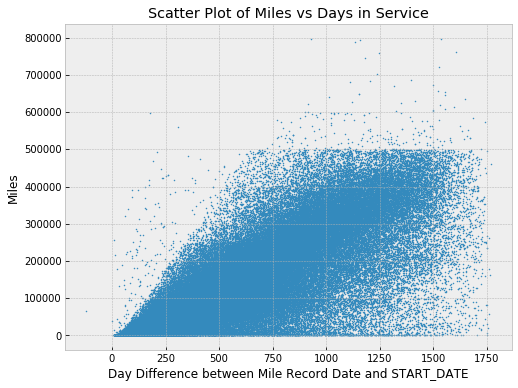

In [95]:
plt.scatter(incident_tracker_df.Days_In_Service, 
            y = incident_tracker_df.Last_Mile_Record, s = 1)
plt.xlabel('Day Difference between Mile Record Date and START_DATE')
plt.ylabel('Miles')
plt.title('Scatter Plot of Miles vs Days in Service')
plt.show()

### Record Date vs Fail Date

In [38]:
incident_tracker_df.loc[:, ['ESN', 'BUILD_DATE', 'CMP_FAIL_DATE_LIST', 'DSID_CREATE_DATE']]

ESN BUILD_DATE                    CMP_FAIL_DATE_LIST  \
0       79625225 2012-11-19                          [2014-08-13]   
1       79625225 2012-11-19              [2015-01-02, 2015-01-02]   
2       79625225 2012-11-19                          [2015-02-19]   
3       79625225 2012-11-19                          [2015-04-28]   
4       79631430 2012-12-19                          [2016-01-13]   
5       79632129 2013-01-03                          [2016-05-23]   
6       79632129 2013-01-03              [2016-02-01, 2016-02-01]   
7       79632129 2013-01-03                          [2015-03-19]   
8       79632129 2013-01-03              [2015-04-16, 2015-04-16]   
9       79632729 2013-01-05                          [2016-02-29]   
10      79633298 2013-01-09              [2016-01-11, 2016-01-11]   
11      79633298 2013-01-09              [2016-02-23, 2016-02-23]   
12      79634316 2013-01-14              [2014-03-24, 2014-03-24]   
13      79634436 2013-01-14                          [2014-07-21]   
14      79634436 2013-01-14                          [2014-07-28]   
15      79634436 2013-01-14                          [2013-08-01]   
16      79634436 2013-01-14                          [2015-05-21]   
17      79634436 2013-01-14                          [2016-06-02]   
18      79634804 2013-01-15              [2017-06-07, 2017-06-07]   
19      79634944 2013-01-16                          [2017-11-01]   
20      79634944 2013-01-16  [2014-04-27, 2014-04-27, 2014-04-27]   
21      79635413 2013-01-16              [2015-02-15, 2015-02-15]   
22      79635413 2013-01-16                          [2015-11-15]   
23      79635413 2013-01-16                          [2014-11-04]   
24      79636105 2013-01-21                          [2013-11-08]   
25      79636122 2013-01-21  [2017-03-30, 2017-03-30, 2017-03-30]   
26      79636122 2013-01-21                          [2015-02-18]   
27      79636488 2013-01-21                          [2015-05-06]   
28      79636710 2013-01-23              [2014-02-06, 2014-02-06]   
29      79636712 2013-01-23                          [2016-10-24]   
...          ...        ...                                   ...   
131091  79895908 2016-01-06                          [2017-03-28]   
131092  79898942 2016-01-20                          [2017-04-17]   
131093  79901117 2016-02-01                          [2017-02-13]   
131094  79906877 2016-03-03                          [2016-10-14]   
131095  79906877 2016-03-03                          [2016-10-11]   
131096  79909273 2016-03-18                          [2017-08-22]   
131097  79909360 2016-03-17                          [2017-01-12]   
131098  79909360 2016-03-17              [2016-09-27, 2016-09-27]   
131099  79912139 2016-04-04                          [2016-08-12]   
131100  79914394 2016-04-14                          [2017-01-24]   
131101  79914394 2016-04-14                          [2017-03-30]   
131102  79915236 2016-04-20                          [2017-08-10]   
131103  79916507 2016-04-25                          [2016-10-14]   
131104  79916507 2016-04-25                          [2016-07-08]   
131105  79916507 2016-04-25                          [2017-09-01]   
131106  79917837 2016-05-03                          [2017-07-28]   
131107  79919816 2016-05-16                          [2017-09-19]   
131108  79926636 2016-06-23                          [2017-06-26]   
131109  79930179 2016-07-14                          [2016-10-04]   
131110  79936042 2016-08-16                          [2017-07-24]   
131111  79939611 2016-09-02                          [2017-07-14]   
131112  79942600 2016-09-22                          [2017-10-12]   
131113  79944700 2016-10-03                          [2017-04-25]   
131114  79948643 2016-10-26                          [2017-06-08]   
131115  79953714 2016-11-30                          [2017-06-22]   
131116  79957529 2016-12-22                          [2017-07-17]   
131117  799

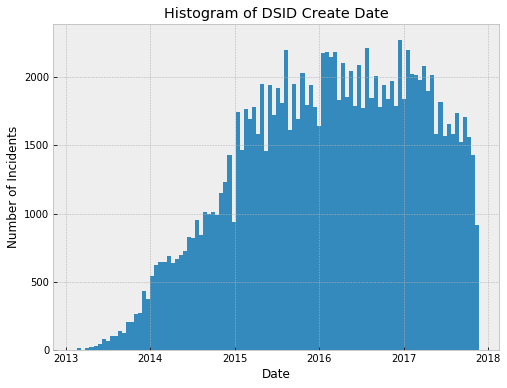

In [41]:
incident_tracker_df.DSID_CREATE_DATE.hist(bins = 100)
plt.title('Histogram of DSID Create Date')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.show()

In [46]:
incident_tracker_df_rep = incident_tracker_df.copy()
incident_tracker_df_rep['Last_Mile_Record'] = \
    incident_tracker_df.CMP_ENGINE_MILES_LIST.apply(lambda x:x[-1])
incident_tracker_df_rep['Last_Mile_Record_Time'] = \
    incident_tracker_df.CMP_FAIL_DATE_LIST.apply(lambda x:datetime.datetime.strptime(x[-1], '%Y-%m-%d'))

In [50]:
incident_tracker_df_rep['Days_Between_Claim_and_DSID'] = \
    (incident_tracker_df_rep.Last_Mile_Record_Time - \
     incident_tracker_df_rep.DSID_CREATE_DATE).apply(lambda x:x.days)

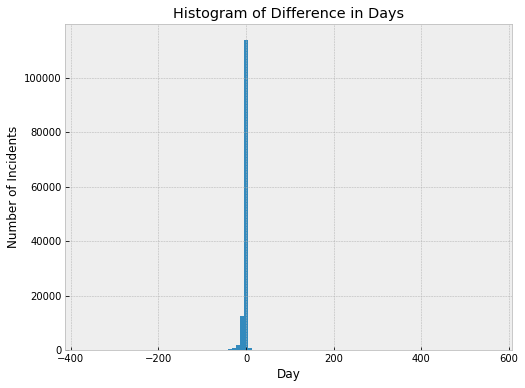

In [51]:
incident_tracker_df_rep.Days_Between_Claim_and_DSID.hist(bins = 100)
plt.title('Histogram of Difference in Days')
plt.xlabel('Day')
plt.ylabel('Number of Incidents')
plt.show()

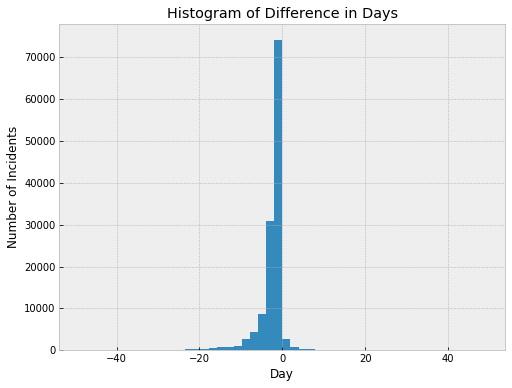

In [56]:
incident_tracker_df_rep.loc[abs(incident_tracker_df_rep.Days_Between_Claim_and_DSID) < 50,
                            'Days_Between_Claim_and_DSID'].hist(bins = 50)
plt.title('Histogram of Difference in Days')
plt.xlabel('Day')
plt.ylabel('Number of Incidents')
plt.show()

In [57]:
incident_tracker_df_rep['Days_Between_Incident_and_Build_Date'] = \
    (incident_tracker_df_rep.DSID_CREATE_DATE - \
     incident_tracker_df_rep.BUILD_DATE).apply(lambda x:x.days)

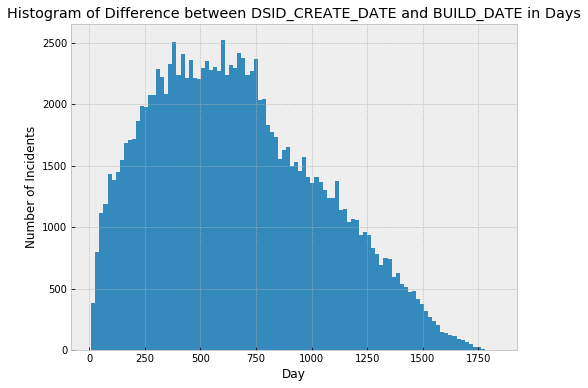

In [69]:
incident_tracker_df_rep.loc[:,
                            'Days_Between_Incident_and_Build_Date'].hist(bins = 100)
plt.title('Histogram of Difference between DSID_CREATE_DATE and BUILD_DATE in Days')
plt.xlabel('Day')
plt.ylabel('Number of Incidents')
plt.show()

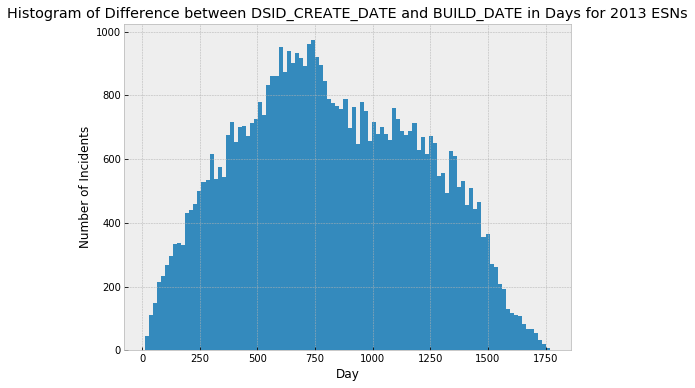

In [68]:
incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2013,
                            'Days_Between_Incident_and_Build_Date'].hist(bins = 100)
plt.title('Histogram of Difference between DSID_CREATE_DATE and BUILD_DATE in Days for 2013 ESNs')
plt.xlabel('Day')
plt.ylabel('Number of Incidents')
plt.show()

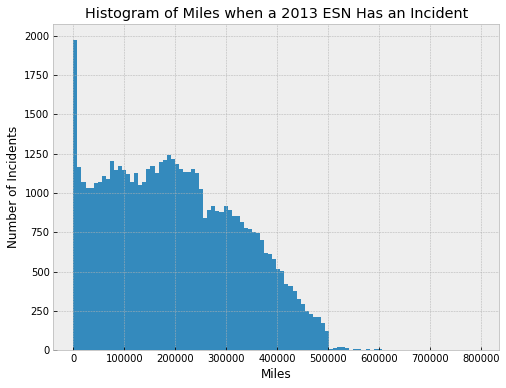

In [67]:
incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2013,
                            'Last_Mile_Record'].hist(bins = 100)
plt.title('Histogram of Miles when a 2013 ESN Has an Incident')
plt.xlabel('Miles')
plt.ylabel('Number of Incidents')
plt.show()

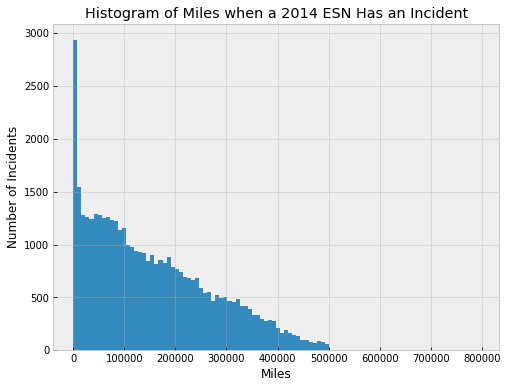

In [121]:
incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2014,
                            'Last_Mile_Record'].hist(bins = 100)
plt.title('Histogram of Miles when a 2014 ESN Has an Incident')
plt.xlabel('Miles')
plt.ylabel('Number of Incidents')
plt.show()

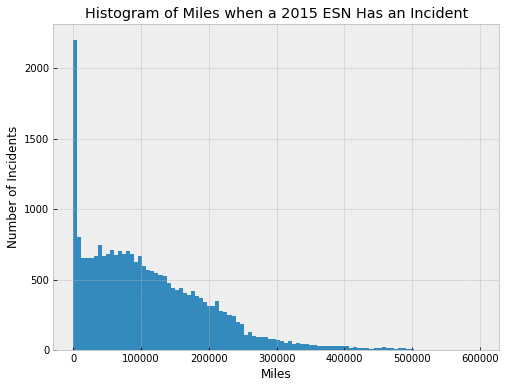

In [122]:
incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2015,
                            'Last_Mile_Record'].hist(bins = 100)
plt.title('Histogram of Miles when a 2015 ESN Has an Incident')
plt.xlabel('Miles')
plt.ylabel('Number of Incidents')
plt.show()

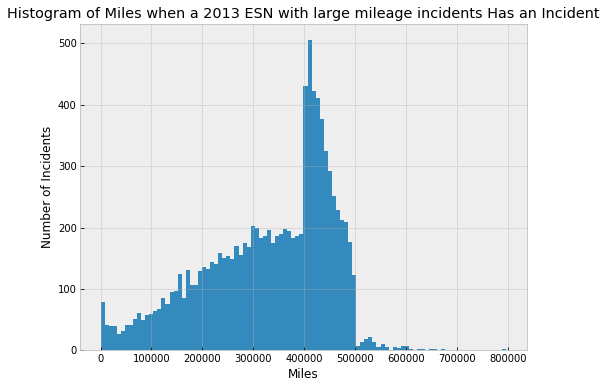

In [94]:
large_mile_ESN_set = set(incident_tracker_df_rep.loc[(incident_tracker_df_rep.BUILD_YEAR == 2013) & 
                                                     (incident_tracker_df_rep.Last_Mile_Record > 400000), 
                                                    'ESN'])

incident_tracker_df_rep.loc[incident_tracker_df_rep.ESN.isin(large_mile_ESN_set),
                            'Last_Mile_Record'].hist(bins = 100)
plt.title('Histogram of Miles when a 2013 ESN with large mileage incidents Has an Incident')
plt.xlabel('Miles')
plt.ylabel('Number of Incidents')
plt.show()

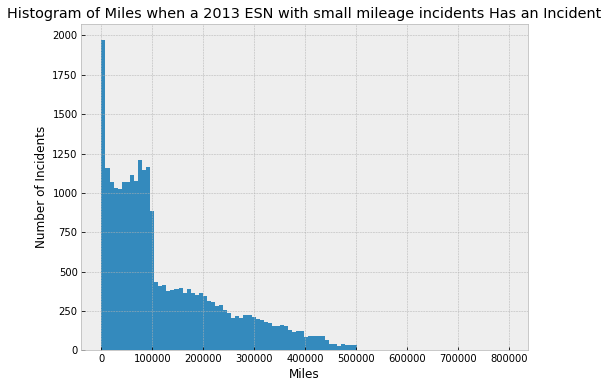

In [93]:
large_mile_ESN_set = set(incident_tracker_df_rep.loc[(incident_tracker_df_rep.BUILD_YEAR == 2013) & 
                                                     (incident_tracker_df_rep.Last_Mile_Record < 100000), 
                                                    'ESN'])

incident_tracker_df_rep.loc[incident_tracker_df_rep.ESN.isin(large_mile_ESN_set),
                            'Last_Mile_Record'].hist(bins = 100)
plt.title('Histogram of Miles when a 2013 ESN with small mileage incidents Has an Incident')
plt.xlabel('Miles')
plt.ylabel('Number of Incidents')
plt.show()

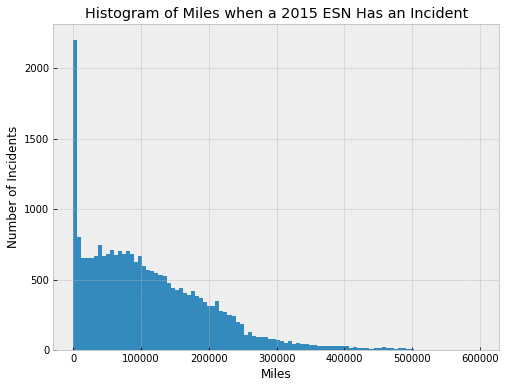

In [90]:
incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2015,
                            'Last_Mile_Record'].hist(bins = 100)
plt.title('Histogram of Miles when a 2015 ESN Has an Incident')
plt.xlabel('Miles')
plt.ylabel('Number of Incidents')
plt.show()

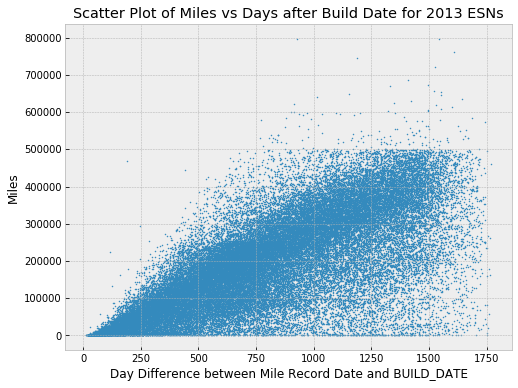

In [75]:
plt.scatter(incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2013, 
                                        'Days_Between_Incident_and_Build_Date'], 
            y = incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2013, 
                                            'Last_Mile_Record'], s = 1)
plt.xlabel('Day Difference between Mile Record Date and BUILD_DATE')
plt.ylabel('Miles')
plt.title('Scatter Plot of Miles vs Days after Build Date for 2013 ESNs')
plt.show()

In [72]:
incident_tracker_df_rep.loc[:, ['Days_Between_Incident_and_Build_Date', 'Last_Mile_Record']]

Days_Between_Incident_and_Build_Date  Last_Mile_Record
0                                        634           98588.0
1                                        774          124517.0
2                                        823          127631.0
3                                        890          138315.0
4                                       1119           21875.0
5                                       1237          395445.0
6                                       1124          366960.0
7                                        805          271953.0
8                                        833          291809.0
9                                       1138          400626.0
10                                      1098          316843.0
11                                      1140          335455.0
12                                       434          115221.0
13                                       553          197727.0
14                                       560          200091.0
15                                       199           61350.0
16                                       857          302137.0
17                                      1239          391195.0
18                                      1605          344841.0
19                                      1751               1.0
20                                       467           50095.0
21                                       762          239067.0
22                                      1034          289525.0
23                                       658          193867.0
24                                       291           23737.0
25                                      1529           49121.0
26                                       758           25875.0
27                                       835          262686.0
28                                       379          174341.0
29                                      1371          284170.0
...                                      ...               ...
131091                                   447          151904.0
131092                                   453          130914.0
131093                                   378          131645.0
131094                                   225           57373.0
131095                                   223           56872.0
131096                                   525           86740.0
131097                                   301           52193.0
131098                                   194           31104.0
131099                                   159           28950.0
131100                                   286           93816.0
131101                                   350          100276.0
131102                                   478          125362.0
131103                                   172           37827.0
131104                                    74            6550.0
131105                                   494          116998.0
131106                                   451           51158.0
131107                                   491          118699.0
131108                                   368           80434.0
131109                                    83            5252.0
131110                                   343          109657.0
131111                                   315           77900.0
131112                                   386           46327.0
131113                                   204           33512.0
131114                                   225            6075.0
131115                                   205           61705.0
131116                                   207           19686.0
131117                                    84           34979.0
131118                                   217            1140.0
131119                                    99            3233.0
131120                                    50             752.0

[131121 rows x 2 columns]

In [77]:
incident_tracker_df_rep.columns.values

array(['ESN', 'DSID', 'REL_ESN', 'CMP_SUM_NET_AMOUNT',
       'CMP_SUM_MATERIALS_AMOUNT', 'CMP_SUM_MARKUP_AMOUNT',
       'CMP_SUM_REPAIR_LABOR_AMOUNT', 'CMP_SUM_OTHER_EXPENSE_AMOUNT',
       'CMP_SUM_DEDUCTIBLE_AMOUNT', 'CMP_FAIL_DATE_LIST', 'CMP_ESN_LIST',
       'CMP_FAIL_CODE_LIST', 'CMP_FAIL_CODE_DESC_LIST',
       'CMP_DISTRIBUTOR_CODE_LIST', 'CMP_CLAIM_NUM_LIST',
       'CMP_ENGINE_MILES_LIST', 'DSID_CREATE_DATE',
       'DSID_LAST_UPDATED_DATE', 'GREEN_WRENCH_NUM_LIST',
       'GREEN_WRENCH_LIST', 'FAULT_CODE_LIST', 'ENGINE_DESCRIPTION',
       'BUILD_DATE', 'BUILD_YEAR', 'BUILD_MONTH', 'BUILD_DAY_OF_MONTH',
       'BUILD_DAY_OF_WEEK', 'BUILT_ON_WEEKEND',
       'BLOWBY_HIGH_IDLE_LAST_TEST_VALUE',
       'BLOWBY_LOW_IDLE_LAST_TEST_VALUE',
       'BLOWBY_RATED_HP_LAST_TEST_VALUE',
       'ECM_BOOST_ABS_HIGH_IDLE_LAST_TEST_VALUE',
       'ECM_BOOST_ABS_LOW_IDLE_LAST_TEST_VALUE',
       'ECM_BOOST_ABS_RATED_HP_LAST_TEST_VALUE',
       'ECM_COOLANT_TEMP_HIGH_IDLE_LAST_TEST_VALUE',


### Build Day of the week

In [82]:
incident_tracker_df_rep.BUILD_DAY_OF_WEEK.value_counts()

Wednesday    28130
Tuesday      27892
Monday       26451
Thursday     25884
Friday       21768
Sunday         768
Saturday       228
Name: BUILD_DAY_OF_WEEK, dtype: int64

In [89]:
tmp_df = incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2013, ['ESN', 'BUILD_DAY_OF_WEEK']].\
    groupby('ESN').first().BUILD_DAY_OF_WEEK.value_counts().reset_index().\
    merge(incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2013, 
                                      'BUILD_DAY_OF_WEEK'].value_counts().reset_index(), on = 'index')
tmp_df.columns = ['BUILD_DAY_OF_WEEK', 'Number_of_ESNs', 'Number_of_Incidents']
tmp_df['Incidents_Per_ESN'] = tmp_df.Number_of_Incidents / tmp_df.Number_of_ESNs
tmp_df

BUILD_DAY_OF_WEEK  Number_of_ESNs  Number_of_Incidents  Incidents_Per_ESN
0         Wednesday            5499                12041           2.189671
1           Tuesday            5373                12131           2.257770
2            Monday            4980                11337           2.276506
3          Thursday            4866                10839           2.227497
4            Friday            4010                 8904           2.220449
5          Saturday              61                  161           2.639344
6            Sunday               2                    8           4.000000

### Cost of Incidents

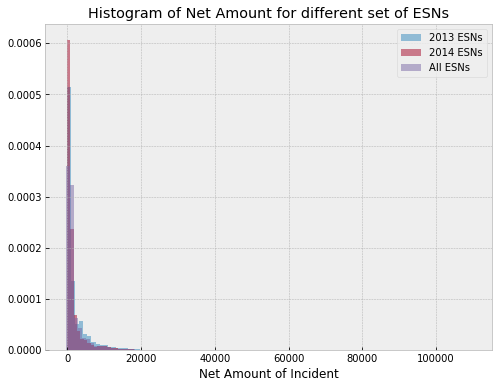

In [107]:
incident_tracker_df_rep.query('BUILD_YEAR == 2013').\
    CMP_SUM_NET_AMOUNT.hist(bins = 100, label = '2013 ESNs', alpha = 0.5, normed = True)
incident_tracker_df_rep.query('BUILD_YEAR == 2014').\
    CMP_SUM_NET_AMOUNT.hist(bins = 100, label = '2014 ESNs', alpha = 0.5, normed = True)
incident_tracker_df_rep.CMP_SUM_NET_AMOUNT.hist(bins = 100, label = 'All ESNs', alpha = 0.5, normed = True)
plt.title('Histogram of Net Amount for different set of ESNs')
plt.xlabel('Net Amount of Incident')
plt.legend()
plt.show()

In [114]:
tmp_df = incident_tracker_df_rep.\
    loc[:, ['BUILD_YEAR', 'CMP_SUM_NET_AMOUNT']].\
    groupby('BUILD_YEAR').sum().reset_index().\
    merge(incident_tracker_df_rep.\
        loc[:, ['BUILD_YEAR', 'CMP_SUM_NET_AMOUNT']].\
        groupby('BUILD_YEAR').mean().reset_index(), on = 'BUILD_YEAR').\
    merge(incident_tracker_df_rep.\
        loc[:, ['BUILD_YEAR', 'ESN']].\
        groupby('BUILD_YEAR').ESN.nunique().reset_index(), on = 'BUILD_YEAR')
tmp_df.columns = ['BUILD_YEAR', 'Total_Net_Amount', 'Net_Amount_Per_Incident', 'Number_of_Unique_ESNs']
tmp_df['Net_Amount_Per_ESN'] = tmp_df['Total_Net_Amount'] / tmp_df['Number_of_Unique_ESNs']

In [115]:
tmp_df

BUILD_YEAR  Total_Net_Amount  Net_Amount_Per_Incident  \
0        2011      2.794100e+02               279.410000   
1        2012      3.342633e+06              2468.709402   
2        2013      1.477231e+08              2665.471782   
3        2014      9.219191e+07              2157.343435   
4        2015      3.054805e+07              1231.925315   
5        2016      7.342839e+06              1278.126809   
6        2017      1.526170e+06              1427.661048   

   Number_of_Unique_ESNs  Net_Amount_Per_ESN  
0                      1          279.410000  
1                    489         6835.649346  
2                  24791         5958.739528  
3                  25059         3678.994149  
4                  17023         1794.516363  
5                   4649         1579.444724  
6                    970         1573.370784

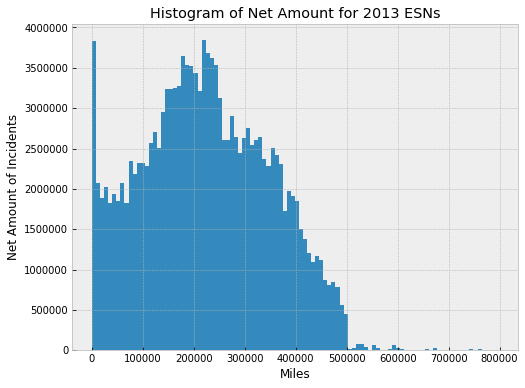

In [118]:
incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2013,
                            'Last_Mile_Record'].\
    hist(bins = 100, 
         weights = incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2013, 'CMP_SUM_NET_AMOUNT'])
plt.title('Histogram of Net Amount for 2013 ESNs')
plt.xlabel('Miles')
plt.ylabel('Net Amount of Incidents')
plt.show()

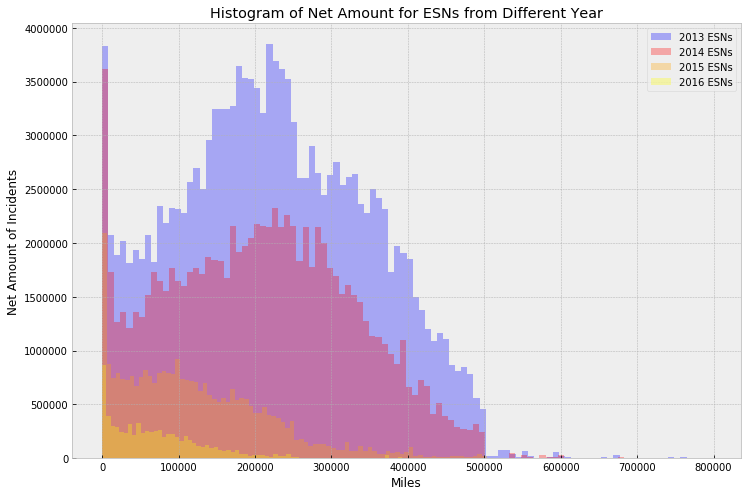

In [148]:
plt.figure(figsize=(12,8))
incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2013,
                            'Last_Mile_Record'].\
    hist(bins = 100, color = 'blue', alpha = 0.3, label = '2013 ESNs',
         weights = incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2013, 'CMP_SUM_NET_AMOUNT'])
incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2014,
                            'Last_Mile_Record'].\
    hist(bins = 100,color = 'red', alpha = 0.3, label = '2014 ESNs',
         weights = incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2014, 'CMP_SUM_NET_AMOUNT'])
incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2015,
                            'Last_Mile_Record'].\
    hist(bins = 100,  color = 'orange', alpha = 0.3, label = '2015 ESNs',
         weights = incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2015, 'CMP_SUM_NET_AMOUNT'])
incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2016,
                            'Last_Mile_Record'].\
    hist(bins = 100,  color = 'yellow', alpha = 0.3, label = '2016 ESNs',
         weights = incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2016, 'CMP_SUM_NET_AMOUNT'])
plt.title('Histogram of Net Amount for ESNs from Different Year')
plt.xlabel('Miles')
plt.ylabel('Net Amount of Incidents')
plt.legend()
plt.show()

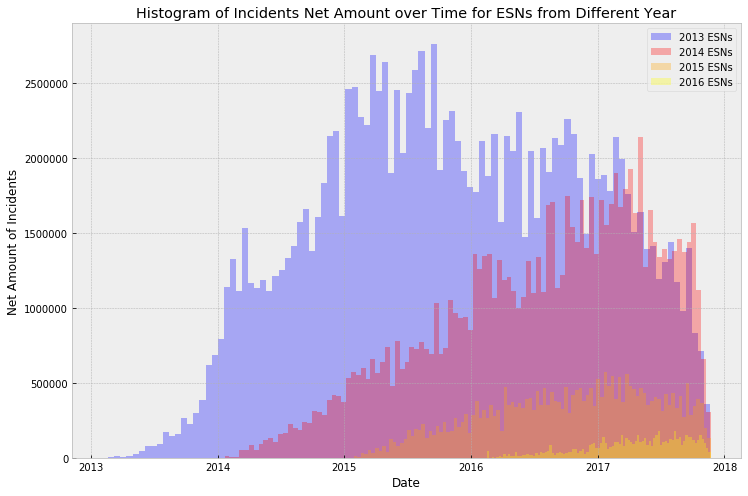

In [159]:
plt.figure(figsize=(12,8))
incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2013,
                            'DSID_CREATE_DATE'].\
    hist(bins = 100, color = 'blue', alpha = 0.3, label = '2013 ESNs',
         weights = incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2013, 'CMP_SUM_NET_AMOUNT'])
incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2014,
                            'DSID_CREATE_DATE'].\
    hist(bins = 100, color = 'red', alpha = 0.3, label = '2014 ESNs',
         weights = incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2014, 'CMP_SUM_NET_AMOUNT'])
incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2015,
                            'DSID_CREATE_DATE'].\
    hist(bins = 100, color = 'orange', alpha = 0.3, label = '2015 ESNs',
         weights = incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2015, 'CMP_SUM_NET_AMOUNT'])
incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2016,
                            'DSID_CREATE_DATE'].\
    hist(bins = 100, color = 'yellow', alpha = 0.3, label = '2016 ESNs',
         weights = incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2016, 'CMP_SUM_NET_AMOUNT'])
plt.title('Histogram of Incidents Net Amount over Time for ESNs from Different Year')
plt.xlabel('Date')
plt.legend()
plt.ylabel('Net Amount of Incidents')
plt.show()

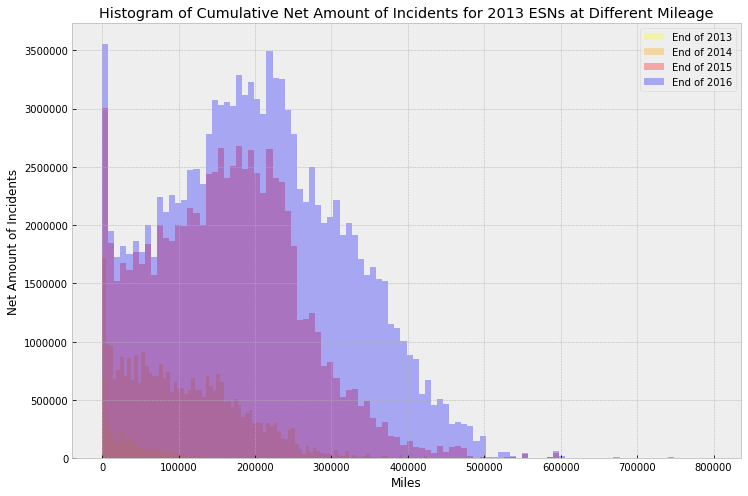

In [155]:
plt.figure(figsize=(12,8))

incident_tracker_df_rep.loc[(incident_tracker_df_rep.BUILD_YEAR == 2013) & 
                            (incident_tracker_df_rep.DSID_CREATE_DATE < \
                                 datetime.datetime.strptime('2013-12-31', '%Y-%m-%d')),
                            'Last_Mile_Record'].\
    hist(bins = 100, color = 'yellow', alpha = 0.3, label = 'End of 2013',
         weights = incident_tracker_df_rep.loc[(incident_tracker_df_rep.BUILD_YEAR == 2013) & 
                                               (incident_tracker_df_rep.DSID_CREATE_DATE < \
                                 datetime.datetime.strptime('2013-12-31', '%Y-%m-%d')), 
                                               'CMP_SUM_NET_AMOUNT'])

incident_tracker_df_rep.loc[(incident_tracker_df_rep.BUILD_YEAR == 2013) & 
                            (incident_tracker_df_rep.DSID_CREATE_DATE < \
                                 datetime.datetime.strptime('2014-12-31', '%Y-%m-%d')),
                            'Last_Mile_Record'].\
    hist(bins = 100, color = 'orange', alpha = 0.3, label = 'End of 2014',
         weights = incident_tracker_df_rep.loc[(incident_tracker_df_rep.BUILD_YEAR == 2013) & 
                                               (incident_tracker_df_rep.DSID_CREATE_DATE < \
                                 datetime.datetime.strptime('2014-12-31', '%Y-%m-%d')), 
                                               'CMP_SUM_NET_AMOUNT'])

incident_tracker_df_rep.loc[(incident_tracker_df_rep.BUILD_YEAR == 2013) & 
                            (incident_tracker_df_rep.DSID_CREATE_DATE < \
                                 datetime.datetime.strptime('2015-12-31', '%Y-%m-%d')),
                            'Last_Mile_Record'].\
    hist(bins = 100, color = 'red', alpha = 0.3, label = 'End of 2015',
         weights = incident_tracker_df_rep.loc[(incident_tracker_df_rep.BUILD_YEAR == 2013) & 
                                               (incident_tracker_df_rep.DSID_CREATE_DATE < \
                                 datetime.datetime.strptime('2015-12-31', '%Y-%m-%d')), 
                                               'CMP_SUM_NET_AMOUNT'])

incident_tracker_df_rep.loc[(incident_tracker_df_rep.BUILD_YEAR == 2013) & 
                            (incident_tracker_df_rep.DSID_CREATE_DATE < \
                                 datetime.datetime.strptime('2016-12-31', '%Y-%m-%d')),
                            'Last_Mile_Record'].\
    hist(bins = 100, color = 'blue', alpha = 0.3, label = 'End of 2016',
         weights = incident_tracker_df_rep.loc[(incident_tracker_df_rep.BUILD_YEAR == 2013) & 
                                               (incident_tracker_df_rep.DSID_CREATE_DATE < \
                                 datetime.datetime.strptime('2016-12-31', '%Y-%m-%d')), 
                                               'CMP_SUM_NET_AMOUNT'])

plt.title('Histogram of Cumulative Net Amount of Incidents for 2013 ESNs at Different Mileage')
plt.xlabel('Miles')
plt.ylabel('Net Amount of Incidents')
plt.legend()
plt.show()

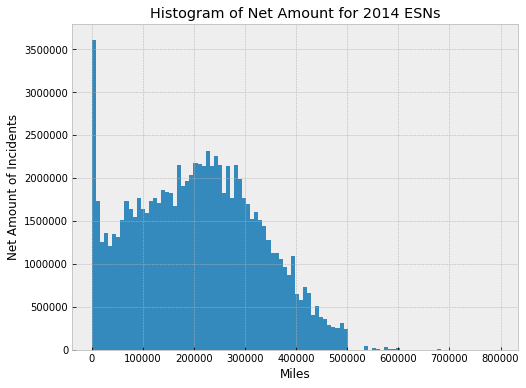

In [120]:
incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2014,
                            'Last_Mile_Record'].\
    hist(bins = 100, 
         weights = incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2014, 'CMP_SUM_NET_AMOUNT'])
plt.title('Histogram of Net Amount for 2014 ESNs')
plt.xlabel('Miles')
plt.ylabel('Net Amount of Incidents')
plt.show()

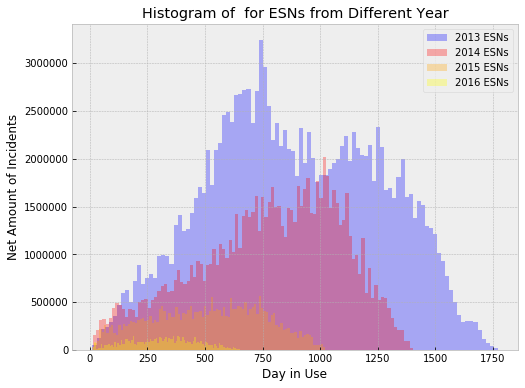

In [150]:
incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2013,
                            'Days_Between_Incident_and_Build_Date'].\
    hist(bins = 100, color = 'blue', alpha = 0.3, label = '2013 ESNs',
         weights = incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2013, 'CMP_SUM_NET_AMOUNT'])
incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2014,
                            'Days_Between_Incident_and_Build_Date'].\
    hist(bins = 100, color = 'red', alpha = 0.3, label = '2014 ESNs',
         weights = incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2014, 'CMP_SUM_NET_AMOUNT'])
incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2015,
                            'Days_Between_Incident_and_Build_Date'].\
    hist(bins = 100, color = 'orange', alpha = 0.3, label = '2015 ESNs',
         weights = incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2015, 'CMP_SUM_NET_AMOUNT'])
incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2016,
                            'Days_Between_Incident_and_Build_Date'].\
    hist(bins = 100, color = 'yellow', alpha = 0.3, label = '2016 ESNs',
         weights = incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2016, 'CMP_SUM_NET_AMOUNT'])
plt.title('Histogram of  for ESNs from Different Year')
plt.xlabel('Day in Use')
plt.ylabel('Net Amount of Incidents')
plt.legend()
plt.show()

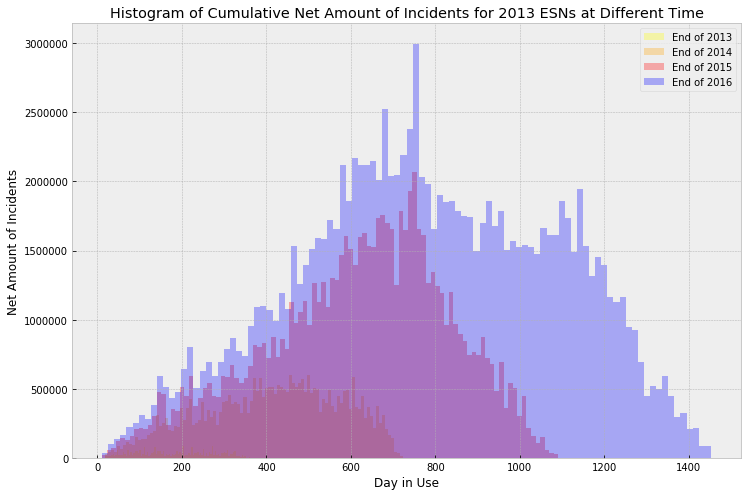

In [154]:
plt.figure(figsize=(12,8))

incident_tracker_df_rep.loc[(incident_tracker_df_rep.BUILD_YEAR == 2013) & 
                            (incident_tracker_df_rep.DSID_CREATE_DATE < \
                                 datetime.datetime.strptime('2013-12-31', '%Y-%m-%d')),
                            'Days_Between_Incident_and_Build_Date'].\
    hist(bins = 100, color = 'yellow', alpha = 0.3, label = 'End of 2013',
         weights = incident_tracker_df_rep.loc[(incident_tracker_df_rep.BUILD_YEAR == 2013) & 
                                               (incident_tracker_df_rep.DSID_CREATE_DATE < \
                                 datetime.datetime.strptime('2013-12-31', '%Y-%m-%d')), 
                                               'CMP_SUM_NET_AMOUNT'])

incident_tracker_df_rep.loc[(incident_tracker_df_rep.BUILD_YEAR == 2013) & 
                            (incident_tracker_df_rep.DSID_CREATE_DATE < \
                                 datetime.datetime.strptime('2014-12-31', '%Y-%m-%d')),
                            'Days_Between_Incident_and_Build_Date'].\
    hist(bins = 100, color = 'orange', alpha = 0.3, label = 'End of 2014',
         weights = incident_tracker_df_rep.loc[(incident_tracker_df_rep.BUILD_YEAR == 2013) & 
                                               (incident_tracker_df_rep.DSID_CREATE_DATE < \
                                 datetime.datetime.strptime('2014-12-31', '%Y-%m-%d')), 
                                               'CMP_SUM_NET_AMOUNT'])

incident_tracker_df_rep.loc[(incident_tracker_df_rep.BUILD_YEAR == 2013) & 
                            (incident_tracker_df_rep.DSID_CREATE_DATE < \
                                 datetime.datetime.strptime('2015-12-31', '%Y-%m-%d')),
                            'Days_Between_Incident_and_Build_Date'].\
    hist(bins = 100, color = 'red', alpha = 0.3, label = 'End of 2015',
         weights = incident_tracker_df_rep.loc[(incident_tracker_df_rep.BUILD_YEAR == 2013) & 
                                               (incident_tracker_df_rep.DSID_CREATE_DATE < \
                                 datetime.datetime.strptime('2015-12-31', '%Y-%m-%d')), 
                                               'CMP_SUM_NET_AMOUNT'])

incident_tracker_df_rep.loc[(incident_tracker_df_rep.BUILD_YEAR == 2013) & 
                            (incident_tracker_df_rep.DSID_CREATE_DATE < \
                                 datetime.datetime.strptime('2016-12-31', '%Y-%m-%d')),
                            'Days_Between_Incident_and_Build_Date'].\
    hist(bins = 100, color = 'blue', alpha = 0.3, label = 'End of 2016',
         weights = incident_tracker_df_rep.loc[(incident_tracker_df_rep.BUILD_YEAR == 2013) & 
                                               (incident_tracker_df_rep.DSID_CREATE_DATE < \
                                 datetime.datetime.strptime('2016-12-31', '%Y-%m-%d')), 
                                               'CMP_SUM_NET_AMOUNT'])

plt.title('Histogram of Cumulative Net Amount of Incidents for 2013 ESNs at Different Time')
plt.xlabel('Day in Use')
plt.ylabel('Net Amount of Incidents')
plt.legend()
plt.show()

/Users/ph697/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:836: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


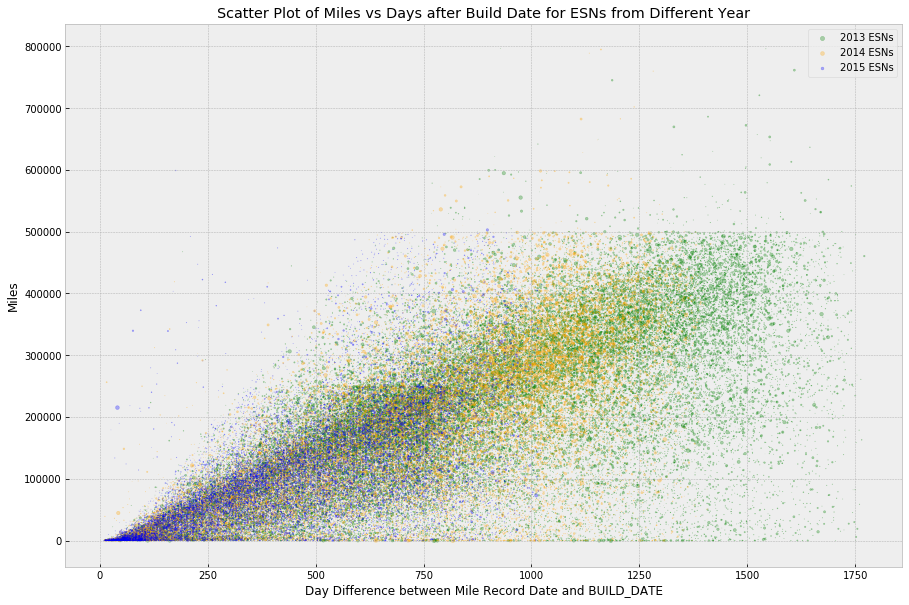

In [139]:
plt.figure(figsize=(15,10))
plt.scatter(incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2013, 
                                        'Days_Between_Incident_and_Build_Date'], 
            y = incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2013, 
                                            'Last_Mile_Record'], 
            s = incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2013, 
                                            'CMP_SUM_NET_AMOUNT']/3000, 
            label = '2013 ESNs', alpha = 0.3, c = 'green')
plt.scatter(incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2014, 
                                        'Days_Between_Incident_and_Build_Date'], 
            y = incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2014, 
                                            'Last_Mile_Record'], 
            s = incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2014, 
                                            'CMP_SUM_NET_AMOUNT']/3000, 
            label = '2014 ESNs', alpha = 0.3, c = 'orange')
plt.scatter(incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2015, 
                                        'Days_Between_Incident_and_Build_Date'], 
            y = incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2015, 
                                            'Last_Mile_Record'], 
            s = incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2015, 
                                            'CMP_SUM_NET_AMOUNT']/3000, 
            label = '2015 ESNs', alpha = 0.3, c = 'blue')
plt.xlabel('Day Difference between Mile Record Date and BUILD_DATE')
plt.ylabel('Miles')
plt.title('Scatter Plot of Miles vs Days after Build Date for ESNs from Different Year')
plt.legend()
plt.show()

In [127]:
np.max(incident_tracker_df_rep.loc[incident_tracker_df_rep.BUILD_YEAR == 2013, 
                                            'CMP_SUM_NET_AMOUNT'])

109587.09